# PCA & LDA

This is a short demonstration where I familiarized myself with PCA and LDA with the scikit-learn library. PCA is a technique for identifying low-dimensional manifolds. Below is a simple example and demonstrates the variance explained by each of the selected components (where n_components = 2). Thus, PCA decomposes the dataset in a set of successive orthogonal components that explain the maximum amount of variance. More about PCA can be found on http://scikit-learn.org/stable/modules/decomposition.html#decompositions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

Run a simple example. Here, 2 components are kept and the explained_variance is shown. This explained_variance is from the sample covariance definition, where the eigen values are along the diagonal in decreasing order. There are now two dimensions which explain the data.

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

pcaSimple = PCA(n_components=2)
pcaSimple.fit(X)

print(pcaSimple.explained_variance_ratio_) 

[0.99244289 0.00755711]


# Iris data set

I will now use a wellknown dataset, also known as the iris data set, where more information can be found on it at http://archive.ics.uci.edu/ml/datasets/Iris. 

The data set is imported through using load_iris2.py from the provided load_iris python module. This converts the class labels to numbers and since there are 3 classes, they are labelled 0, 1, and 2. 

The data is fit with PCA and I investigate what happens when I fit the data with 3 principal components to see how much of the variance is explained by these components.

(150, 4)
[5.84333333 3.05733333 3.758      1.19933333]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


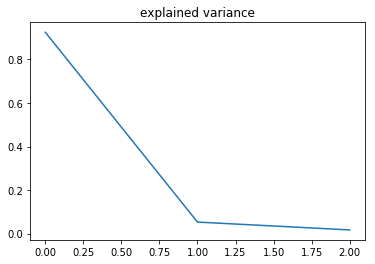

[0.92461872 0.05306648 0.01710261]


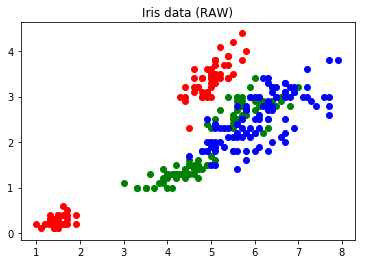

In [3]:
#Load the data

from sklearn.datasets import load_iris
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target        #target gives a previously determined label for each characteristic (feature)
classes = set(labels)
print(data.shape)
N = data.shape[0]
d = data.shape[1]
#print(data[labels==0])          #print the data for each class (0, 1, or 2)
#print(data)
mean = np.zeros(d)
for j in range (0, d):
    for i in range (0, N):
        mean[j] += data[i, j]
    mean[j] = mean[j]/N
print(mean)
#Fit the data with PCA
pcaIris = PCA(n_components=3)
pcaIris.fit(data)

cov = pcaIris.get_covariance()
print(cov)
plt.figure()
plt.plot(pcaIris.explained_variance_ratio_)
plt.title("explained variance")
plt.show()

print(pcaIris.explained_variance_ratio_)

#visualise the Iris data
c_1 = ['r','g','b']
for i in range (0,3):
    
    plt.scatter(data[labels==i,0], data[labels==i,1], c = c_1[i])
    plt.scatter(data[labels==i,2], data[labels==i,3], c = c_1[i])
    plt.title("Iris data (RAW)")
    

# Projecting the data

The data is now projected onto the first two principal components. Now it is visible to see how much class seperation is obtained through projecting onto the first two principal components.

(150, 2)
(150, 2)


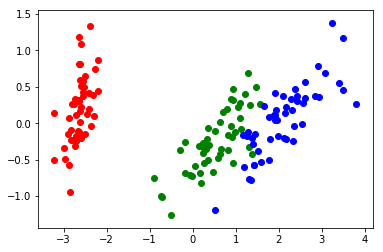

In [4]:
pca = PCA(n_components=2)
x1 = pca.fit(data).transform(data)
print(x1.shape)
plt.figure()
print(x1.shape)
c = ['r','g','b']
for i in range(0,3):
    plt.scatter(x1[labels == i, 0], x1[labels == i, 1], color = c[i])             #this is a 150 x 2 matrix, with 150 rows and 2 columns. 
plt.show()                                                                        #therefore, at increment i will show the data with same class labels i (i'th rows) at corresponding column/axes [0] or [1]

# Face recognition

The next part introduces facial recognition through using eigenfaces, see https://en.wikipedia.org/wiki/Eigenface 

The code demonstrates the main ideas of the eigenface approach using the Olivetti face database.

In [5]:
from skimage import io                                           #import module to read and write images in various formats
ic = io.ImageCollection('../data/att_faces/*/*.png')             #io.ImageCollection  --> Load and manage a collection of image files. * behaves as a tuple here, passing through variable arguments
ic = np.array(ic)     

print(len(ic))
ic_flat = ic.reshape((len(ic), -1))                              #here, the array is reshaped for each length [0..399], therefore numpy looks at the length of the array and the remaining dimensions, reshapes it, and the result is still compatible with the original shape
number,m,n = ic.shape                                            #use reshape(-1,1) if your data has a single feature. In this case, not. (1,-1) means row known (which is len(ic)) and column unknown, used for multiple features and only targets a single sample.

print(ic.shape)
print(ic_flat.shape)

399
(399, 112, 92)
(399, 10304)


## Viewing the faces

Using iPython widgets, the faces can be viewed by importing an image viewer

In [6]:
from ipywidgets import interact

def view_image(n=0):                                          #function which views image , this one is set to start at 10 when displayed
    plt.imshow(ic[n], cmap='gray', interpolation='nearest')   #imshow --> create an image from a two-dimensional numpy array
    plt.show()                                                #interpolation is an algorithm used to blend square colors; with 'nearest' colors will not be blended and color map used to specify colors

w = interact(view_image, n=(0, len(ic)-1))                    #view images ranging from [0...399], where a slider is generated and bound to the function parameter. Thus the function should be with parameter n, and in interact the upperlimit is set as the other parameter of the interact widget

interactive(children=(IntSlider(value=0, description='n', max=398), Output()), _dom_classes=('widget-interact'…

An investigation is now done as to how many principal components are needed to capture a significant amount of information of a face. The ratio of total variance explained by n components is calculated, where n is selected as n=200 and is plotted below.

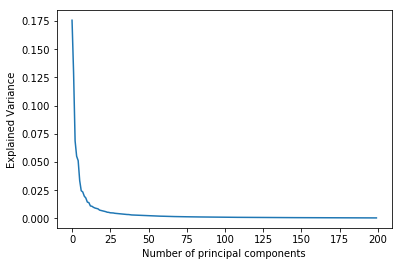

In [7]:
pcaFaces = PCA(n_components=200)
pcaFaces.fit(ic_flat)                           #fit the model to ic_flat

plt.figure()                                    #plot the result of the explained_variance_ratio
plt.plot(pcaFaces.explained_variance_ratio_)
plt.xlabel("Number of principal components")
plt.ylabel("Explained Variance")
plt.show()

#print(pcaFaces.explained_variance_ratio_)      #explained variance for each principal component

### Projecting the faces onto the eigenfaces

All the images are projected onto the 200 eigenfaces defined above. To visualise what information is lost, the projected images are projected back onto the original space, reshaped and then displayed.

In [8]:
pr_ic_flat = pcaFaces.transform(ic_flat)                    #apply dimensionality reduction on ic_flat, where ic_flat is projected onto the first principal components previously selected
print(pr_ic_flat.shape)
back_pr_ic_flat = pcaFaces.inverse_transform(pr_ic_flat)    #transform data back to its original space
print(back_pr_ic_flat.shape)

(399, 200)
(399, 10304)


Restore flattened array into its original shape and view the restored images. Keep in mind that the dimensions of the images are reduced from 10304 to 200, the reconstruction is quite good.

In [9]:
ic_restore = back_pr_ic_flat.reshape((number,m,n))                  #previously saved these variables for ic.shape which is (399, 112, 92)

def view_image(n=0):                                                #same image viewer as before
    plt.imshow(ic_restore[n],cmap='gray', interpolation='nearest')
    plt.show()

w = interact(view_image, n=(0, len(ic)-1))

interactive(children=(IntSlider(value=0, description='n', max=398), Output()), _dom_classes=('widget-interact'…

### Projecting something else

Previously, the faces were represented used to derive the eigenfaces in terms of the eigenfaces. Now the attention is shifted to faces not part of the training set.

Now, someone elses face is used and the same procedure is followed as above 

(112, 92)


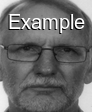

In [10]:
ben = io.ImageCollection('../resources/images/Ben_bw.png')[0]             #select the image in the collection, in this case, only one image so use [0] otherwise will show 1 x 112 x 92+
ben = np.array(ben)                                                       #create an array 
print(ben.shape)
display(Image(filename='../resources/images/Ben_bw_wm.png'))

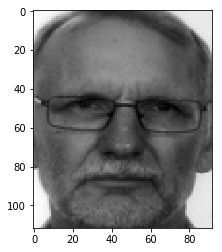

In [11]:
#code to produce the image below (from the array!)
plt.figure()
plt.imshow(ben, cmap='gray', interpolation='nearest')
plt.show()

Flatten the face, project it onto 200 eigenfaces, restore it from the projection and display.

(112, 92) ben shape
(1, 10304) ben_flat shape
(1, 10304) shape of inverse transform of ben_flat after transformation
(112, 92) reproduced original shape of image and image


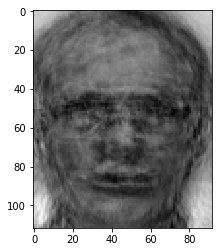

In [12]:
ben_flat = ben.reshape((1, -1))                                                               #row known as it is len(ben) which is 1 as it is 1 image, and column is unknown which numpy will figure out

print(ben.shape, "ben shape")
print(ben_flat.shape, "ben_flat shape") 

m,n = ben.shape                                                                               #store the original shape of ben to use later when restoring

pcaben = PCA(n_components=200)                                  
pcaben.fit(ic_flat)

pr_ben_flat = pcaben.transform(ben_flat)                                                      #apply dimensionality reduction
back_pr_ben_flat = pcaben.inverse_transform(pr_ben_flat)                                      #inverse transform to try and restore the image to its original shape

print(back_pr_ben_flat.shape, "shape of inverse transform of ben_flat after transformation")

ben_restore = back_pr_ben_flat.reshape((m,n))                                                 #reshape to original shape m x n

print(ben_restore.shape, "reproduced original shape of image and image")

plt.figure()
plt.imshow(ben_restore,cmap='gray', interpolation='nearest')
plt.show()

## Signatures

The next section builds a signature verification system. Signatures vary as to the origin of whatever coordinate system we use, the size and (in-plane) rotation. The system could recognize signatures at different positions, sizes and rotations but will complicate the system and demand a large training set representing different scenarios. Instead, it is easier to do pre-processing normalizing signatures. This might fail on some signatures, but PCA is still a valuable tool for doing this and shows the underlying mechanism of the singular value decomposition (SVD).

The signatures captures the x and y coordinates, pen pressure, pen angle(tilt) and pen direction. Only the x and y coordinates (which are the first two features) are used from the provided data.

The code calculates the SVD of the signature (just for x and y coordinates). Then, the SVD is used to transform the original signature data. The data is rotated, scaled so that the standard deviation along the first principal axis equals 1 and finally the data is whitened. 

(723, 5) sign_full shape
(2, 723) sign shape


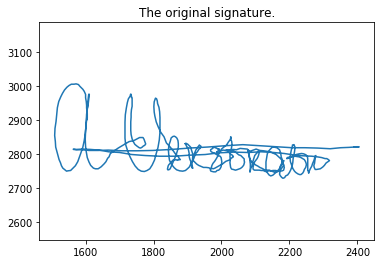

In [13]:
sign_full = np.loadtxt('../data/sign/sign3/sigtrain3_1.txt',comments = '%')  #loadtxt --> load data from a textfile, it is in the form N x D

sign = sign_full[:,:2].T                                                     #takes all the data from the first two columns (which is the two features x-coordinate & y-coordinate) and puts it to d x N array

print(sign_full.shape, "sign_full shape")
print(sign.shape, "sign shape")

plt.figure()
plt.plot(sign[0,:],sign[1,:])                                                #plots everything in the first and second row, [row, :] means take all the columns indicated with ":"
plt.axis('equal')
plt.title('The original signature.')
plt.show()

### Removing the mean

To center the signature, the mean is removed, i.e. normalizes it with respect to position

(2, 1) - two rows one colum (column vector)


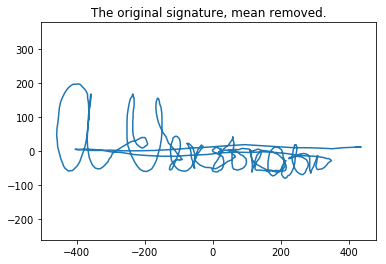

In [14]:
d,n = sign.shape
mean = np.mean(sign,axis=1)[:,np.newaxis]                         #axis=1 calculates the mean along the horizontal axis (from left to right for each individual row).
                                                                  #np.newaxis is used to increased the dimension, i.e., from 1D to 2D in this case. [np.newaxis, :] will make it as a row vector by inserting an axis along the first dimension. In this case we have a column vector.
print(mean.shape, "- two rows one colum (column vector)")                                                  
sign = (sign - mean)

plt.plot(sign[0,:],sign[1,:])                                     #plot the signature again as above, the mean has now been removed.
plt.axis('equal')
plt.title('The original signature, mean removed.')
plt.show()

### Calculating the principal components

The principal components are calculated using the SVD. The principal directions as well as one standard deviation is illustrated through calculating the one standard deviation ellipse, aligned along the principle directions.

(2, 723)
(2,) singular values
[[-0.98734389  0.15859398]
 [ 0.15859398  0.98734389]]


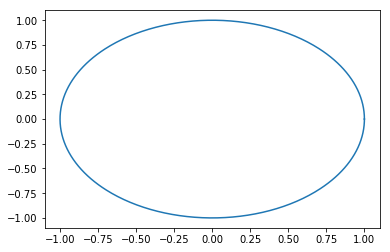

(2, 500)


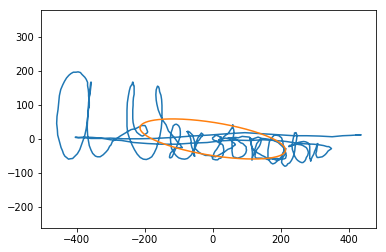

In [15]:
# Define Circle
ang = np.linspace(0,2*np.pi,500)                                                           #returns 500 evenly spaced samples of angles, calculated over [start, stop, num=500]
x = np.cos(ang); y = np.sin(ang)                                                                     
circ = np.vstack((x,y))                                                                    #coordinates of the circle



# Calculate the principal directions using the SVD
u, s, vh = np.linalg.svd(sign,full_matrices=False)                                         #https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html  -->syntax of svd
print(vh.shape)
print(s.shape, "singular values")
print(u)
# Ellipse aligned with principal directions, one standard deviation intersect.
# Note scaling of singular values so that scaled values express the standard deviations.
ell = u.dot(np.diag(s/np.sqrt(n))).dot(circ)                                              #dot because multiplying arrays, n = 723 from the shampee d x n

plt.figure()
plt.plot(circ[0], circ[1])
plt.show()
print(ell.shape)
plt.figure()
plt.plot(sign[0,:],sign[1,:])
plt.plot(ell[0, :], ell[1, :])
plt.axis('equal')
plt.show()


### Getting the sign right

The sign of the eigenvectors (principal directions) is not determined, which means there is no way of predicting whether they are returned with a specific sign. Thus, if the sign is wrong, it will be reflected around the coordinate axis. Thus, it is necessary to check whether the sign is correct, and if not, flip it. It is thus convenient to assume that the signatures are produced from left to right. This means that the x component of the first principal direction, and the y coordinate of the second principal direction should be positive. It does not work for all cases, but hopefully for most.

[[ 0.98734389  0.15859398]
 [-0.15859398  0.98734389]]
[ 0.98734389 -0.15859398]


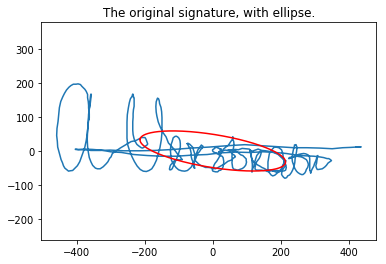

In [16]:
#this code basically multiplies from top down and left to right. This is because the signatures are produced from left to right
sgn = np.sign(u[0,0])
u[:,0] = sgn*u[:,0]
vh[0,:] = sgn*vh[0,:]

sgn = np.sign(u[1,1])
u[1,:] = sgn*u[1,:]
vh[1,:] = sgn*vh[1,:]                            
print(u)
print(u[:,0])

#same plot drawn again, but the signs of u and vh are fixed
plt.figure()
plt.plot(sign[0,:],sign[1,:])
plt.plot(ell[0,:],ell[1,:],'r')
plt.axis('equal')
plt.title('The original signature, with ellipse.')
plt.show()

### Rotating the signature

Using the SVD components, the signature is rotated so that the principal axis coincide with the coordinate axis.

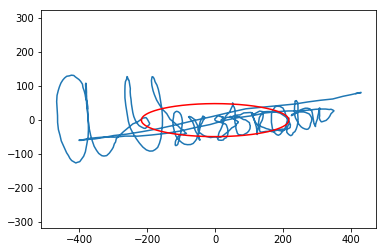

In [17]:
diag_sigma = np.diag(s)                              #just get the diagonal of the matrix of singular values
rotated = diag_sigma.dot(vh)                         #multiple this with the array (vh). vh does not need to be transposed, as it is already in the form d x N
rotatedell= u.T.dot(ell)                             #rotate the ellipse

plt.figure()
plt.plot(rotated[0,:],rotated[1,:])
plt.plot(rotatedell[0,:],rotatedell[1,:],'r')
plt.axis('equal')
plt.show()

### Scale the signature

The signature is now scaled,whilst preserving the aspect ratio so that the standard deviation along the first principal directions equal 1

5830.95078326922


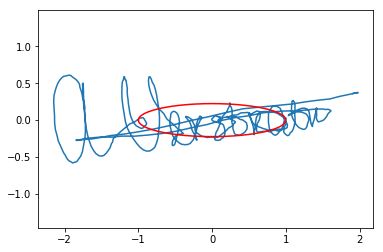

In [18]:
print(np.max(s))

scaled_sign=rotated*(np.sqrt(n)/np.max(s))           #We need to divide by (standard_dev/sqrt_N), so here we multiply by (sqrt_N/standard_dev)
scaled_ell=rotatedell*(np.sqrt(n)/np.max(s))         #scale the ellipse with same factor 

plt.plot(scaled_sign[0,:],scaled_sign[1,:])
plt.plot(scaled_ell[0,:],scaled_ell[1,:],'r')
plt.axis('equal')
plt.show()

### Whiten the signature

The signature is now scaled, without preserving the aspect ratio so that the standard deviation along the first principal directions equal 1

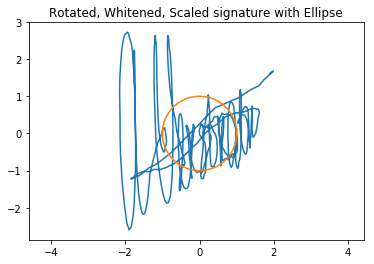

In [19]:
scaled_sigma=np.diag(s)*(np.sqrt(n)/np.max(s))                                         #scale the ellipse, aspect ratio not maintained
whiten_sign = vh*np.sqrt(n)
scaled_white_rotated_ell = np.linalg.inv(scaled_sigma).dot(scaled_ell*np.sqrt(n))

plt.figure()
plt.plot(whiten_sign[0,:], whiten_sign[1,:])
plt.plot(scaled_white_rotated_ell[0, :], scaled_white_rotated_ell[1, :])
plt.axis('equal')
plt.title('Rotated, Whitened, Scaled signature with Ellipse')
plt.show()

# Linear Discriminant Analysis (LDA)

PCA above can be seen as a dimensionality reduction scheme, projecting onto directions with maximum variance.

LDA is also a dimensionality reduction scheme, but operates on a different principle. The data is now labelled according to the different classes they belong to. An input *x* and a class label *y* is given corresponding to *x* for each data point. If there are *k* classes, *y* will take on one of *k* values (0 through *k-1* in Python).

The idea now is to project data onto a lower-dimensional space in such a way that maximal class seperation is achieved in the lower dimensional space. Therefore, the axis system we choose will distinguis class membership, instead of only maximizing the variance. More about the scikit-learn implementation can be found on http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html

## Simple example

The following is a warmup example from the scikit-learn website. The code predicts class labels for samples in X.

In [20]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LDA()
clf.fit(X, y)
print(X)
print(y)
print(clf.predict([[-0.8, -1]]))
print(clf.predict([[2, 3]]))

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[1 1 1 2 2 2]
[1]
[2]


## Wine data set

The difference between PCA and LDA is now investigated through using the wine data set - http://archive.ics.uci.edu/ml/datasets/Wine. The wine data set is 13-dimensional, so the difference between PCA and LDA is more pronounced than the iris data set.

It is only projected down to 2 dimensions for easy visualisation. Since there are only 3 classes, one does not retaing any more information through using higher dimensions.

### Loading the data

Read the data, extract the class labels from the last column, and extract the names of classes using the `set` type

In [21]:
wine_train = np.loadtxt('../data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes,dtype=int)
wine_train_labels = np.array(wine_train_labels,dtype = int)
wine_train = wine_train[:,:-1]

wine_test = np.loadtxt('../data/wine/wine_test.txt',delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes,dtype=int)
wine_test_labels = np.array(wine_test_labels,dtype = int)
wine_test = wine_test[:,:-1]

## PCA

#### The data is first projected onto 2 PCA components and displays the classes of the dimension-reduced data

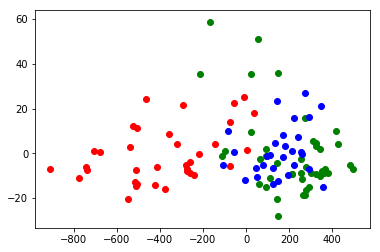

In [22]:
PCA_wine = PCA(n_components=2)


xWine = PCA_wine.fit(wine_train).transform(wine_train)

plt.figure()
c = ['r','g','b']
for i in range(1,4):
    plt.scatter(-xWine[wine_train_labels == i, 0], xWine[wine_train_labels == i, 1], color = c[i-1])
plt.show()

## LDA

#### An LDA model is fit to the data, using 2 components and displays the different classes of the projected data

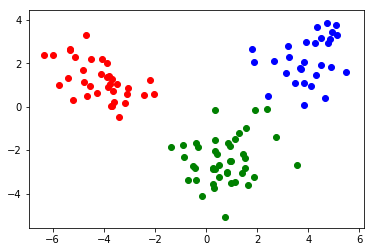

In [23]:
clfWine = LDA()
LDAwine = clfWine.fit_transform(wine_train, wine_train_labels)

plt.figure()
c = ['r','g','b']
for i in wine_train_classes:
    plt.scatter(LDAwine[wine_train_labels == i, 0], LDAwine[wine_train_labels == i, 1], color = c[i-1])

plt.show()

# Do it yourself

Here, an attemp is made to write my own code to implement PCA

## PCA

In [24]:
class myPCA:                           #class is just a template with methods in it , i.e. myPCA is template and someFunction is the obejct inside
    
    def __init__(self, n_components):
        self.n = n_components
        self.mean_k = 0
        self.u_v = 0
        
    def fit(self, data):
        
        #1)initiate cal_cov function
        #2)calc & store eigen vector and eigen value of covariance (S)
        #3)Sort it in descending order
        #4)reduce the dimensions through restricting it to n_components
        
        #1 & 2
        cov = self.cal_cov(data);
        eig_val, eig_vec = np.linalg.eig(cov)
        
        #3
        sortedEig = np.diag(eig_val)
        print(sortedEig)
        
        #4
        self.u_v = np.zeros((self.d, self.n))
        eignval_v = np.zeros((self.n, self.n))                  #remember np.zeros(2) , np.zeros((2,1)) , arguement needs to be an int or sequence of int

        for i in range (0,2):
            self.u_v[:,i] = eig_vec[:,i]
            eignval_v[i,i] = sortedEig[i,i]
     
    #transform the data 
    def transform(self, data):       
        data_transf = ((self.u_v.T).dot(data.T)).T        
        return data_transf
    
    
    #Here, we want to use the covariance matrix from p.65 of main. Therefore, we first need the mean, xbar, in order to calculate the summation    
    def cal_cov(self, data):    
        #calculate mean
        self.N = data.shape[0]                                  #number of samples of the data
        self.d = data.shape[1]                                  #number of features of the data
        self.mean_k = np.zeros(self.d)                          #we want a matrix of the mean of the four features, d
        
        for k in range (0,self.d):
            for i in range (0,self.N):
                self.mean_k[k] += data[i, k]
            self.mean_k[k] = self.mean_k[k]/self.N              #simply sum the samples of each feature and divide by N to get the mean of each feature
        
        #calculate covariance matrix using the formula  
        cov = np.zeros((self.d,self.d))                         #This will be a d x d matrix
        for i in range (0, self.N):
             
            data_k = data[i,:]                                   #take the row of all the features, then we can compute sample - mean, as it will be 1 x 4 matrix - 1 x 4 matrix
            data_k -= self.mean_k                                #a-=b is the same as a = a - b
            data_k = data_k.reshape(self.d,1)                    #want it as a vector with d x 1
            cov += data_k.dot(data_k.T)                          #now, dx1 dot 1 x d = d x d covariance matrix 
        
        cov = cov/self.N  
        return cov
            
            
        

[[4.20005343 0.         0.         0.        ]
 [0.         0.24105294 0.         0.        ]
 [0.         0.         0.0776881  0.        ]
 [0.         0.         0.         0.02367619]]
(150, 2)


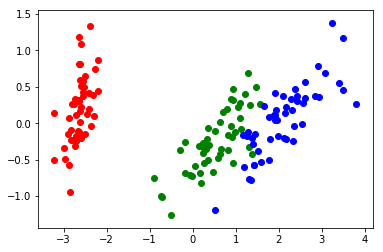

In [25]:

from sklearn.datasets import load_iris
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target        #target gives a previously determined label for each characteristic (feature)
classes = set(labels)
#print(data.shape)
test = myPCA(2)

#mean_1 = test.fit(data)
data_test = test.fit(data)
data_test = test.transform(data)
print(data_test.shape)
c_1 = ['r','g','b']
for i in range (0, 3):
    plt.scatter(data_test[labels==i, 0], -data_test[labels==i, 1], c = c_1[i])


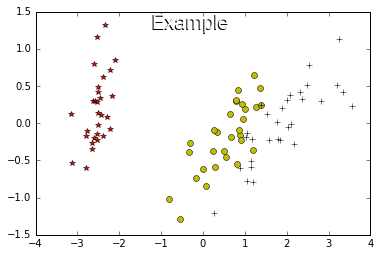

In [26]:
display(Image(filename='../resources/images/Iris_PCA.png'))